---

## **Plotando Umidade do Solo com SMAP**

---

**OBJETIVO:** Aprender a plotar mapa de umidade do solo.

---

**DADOS DE ENTRADA:** São utilizados dados de umidade do solo do satélite [Soil Moisture Active-Passive (SMAP)](https://space.oscar.wmo.int/satellites/view/smap).
- **Nome do dado:** NASA-USDA Enhanced SMAP Global Soil Moisture Data
- **Dados disponiveis em:** https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture
- **Período disponível:** 2015-04-02T12:00:00Z - 2022-05-01T00:00:00
- **Fornecedor:** [NASA GSFC](https://gimms.gsfc.nasa.gov/SMOS/SMAP/)
- **Resolução espacial:** 10 km
- **Resolução temporal:** 3 dias

---


**DADOS DE SAÍDA:** Figura
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo PNG
- **Imagens geradas:**
    1. Fig_1_Mapa_SMAP_dias_2_14_23_26_dez2021.png
    2. Fig_2_Serie_temporal_SMAP_desastres.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   Instalações iniciais
2.   Montagem do drive online
3.   Define caminho do drive
4.   Download dos shapefiles
5.   Declaração de funções
6.   Definição de parâmetros
7.   Plotando mapa simplle no Geemap
8.   Gerando série temporal para três localidades
9.   Gerando série temporal para várias localidades  
10.  Mapa de umidade do solo  

---

**OBSERVAÇÕES IMPORTANTES**:
1. Criar conta no [Google Earth Engine (GEE)](https://earthengine.google.com/)
2. Mudar o caminho para o do seu drive.

---

- **Realizado por:** Enrique V. Mattos - 04/07/2023
- **Atualizado por:** Enrique V. Mattos - 04/07/2023

# **1° Passo:** Instalações iniciais do GEE

##**a) Iniciando o `GEE`**

In [1]:
# instalando geemap
!pip install geemap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


In [2]:
# importando GEE e geemap
import ee
import geemap

In [3]:
# inicializando GEE pelo geemap
geemap.ee_initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=4E9RSs7b8Z9cXZ2fYr8cYbMqiqlKJeb5MM4-LnGJtvk&tc=qmI0wceRwlLt3yPmfdgSfzJeU42nykOek4PlUd3J37Y&cc=TrNjTUGZr0U7hm_MNn199VE1P-xWMwIdWJ3i_P3A1Eg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AZEOvhXAA0h2M2Sz7oBH1uj0elZlOWDZOOFeNn4uXyTPCqSBGEr-ZJAYvIQ

Successfully saved authorization token.


##**b) Instalando demais bibliotecas**

In [4]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
--2023-07-04 20:03:35--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6.2K) [text/plain]
Saving to: ‘cartopy_feature_download.py.1’

cartopy_feature_dow 100%[===================>]   6.18K  --.-KB/s    in 0s      

2023-07-04 20:03:35 (83.3 MB/s) - ‘cartopy_feature_download.py.1’ saved [6332/6332]

Feature physical, coastline, 110m length: 134
Feature physical, coastline, 50m length: 1428
Feature physical, coastline, 10m length: 4133
Feature physical, land, 110m length: 127
Feature physical, land, 50m length: 1420
Feature physical, land, 10m length: 

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [5]:
# instalando eemont e geemap
!pip install -q eemont
!pip install -q wxee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.2 MB/s eta 0:00:00


In [6]:
# Instalando o Salem (usado para mascarar regiões)
!pip install -q rasterio
!pip install -q pyproj
!pip install -q geopandas
!pip install -q salem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.5 MB/s eta 0:00:00


##**c) Importando bibliotecas**

In [7]:
# importando eemont e geemap
import eemont
import geemap
import pandas as pd
import numpy as np
import proplot as plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import salem
import wxee as wx
import xarray as xr

# vamos ignorar avisos desnecessários no código
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **2° Passo:** Monta drive

In [8]:
# montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Define caminho do drive

In [9]:
# caminho da pasta do código
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/10_UMIDADE_DO_SOLO/'

# **4° Passo:** Download de informações auxiliares

In [10]:
# Baixando o arquivo de shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o /content/br_unidades_da_federacao.zip
print('\n')

--2023-07-04 20:12:07--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  8.96MB/s    in 1.2s    

2023-07-04 20:12:09 (8.96 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]



Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          




# **5° Passo:** Declarando funções

In [11]:
#-----------------------------------------------------------------------------------
# Função que plota os Estados
#-----------------------------------------------------------------------------------
def evm_plot_states(shapefile, cor, espessura_linha):

    """
    Retorna a plotagem dos contornos de um shapefile na figura

    Parâmetros de entrada:
                shapefile (shp): shapefile da regiao

    Parâmetros de saída:
                figura com o contorno da região baseado no shapefile fornecido
    """
    import cartopy.crs as ccrs
    import cartopy.io.shapereader as shpreader
    import matplotlib.pyplot as plt

    shapefile = list(shpreader.Reader(shapefile).geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor=cor,facecolor='none', linewidth=espessura_linha)

#**PARTE 0:** Definições de parâmetros

**There are several ways you can create a region for generating the training dataset.**


1.  Draw a shape (e.g., rectangle) on the map and the use region = Map.user_roi

2.  Define a geometry, such as region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])

3.  Create a buffer zone around a point, such as region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)

4.  If you don't define a region, it will use the image footprint by default

In [12]:
# dataset de umidade do solo
Snippet = 'NASA_USDA/HSL/SMAP10KM_soil_moisture'

# datas
datai = '2021-12-23'
dataf = '2021-12-26'

# recorte dos estados
# Minas Gerais
mg = ee.FeatureCollection('FAO/GAUL/2015/level1') \
       .filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais'))

# Bahia
ba = ee.FeatureCollection('FAO/GAUL/2015/level1') \
       .filter(ee.Filter.eq('ADM1_NAME', 'Bahia'))

# região quadrado
roi_quadrado = ee.Geometry.Rectangle([-49., -23., -35., -10.])

# ponto da série temporal
roi_ponto =  ee.Geometry.Point([-39.0714, -16.4374]).buffer(10_000)

In [13]:
# leitura do arquivo de desastres naturais do CEMADEN
df = pd.read_excel(f'{dir}input/BA_MG_12_2021.xlsx')
df

,item,data,lat,lon,municipio,uf,tipo
0,1,24/12/2021,-13.226212,-39.508241,MUTUÍPE,BA,Deslizamento
1,2,25/12/2021,-14.784343,-39.266165,ITABUNA,BA,Inundação
2,3,25/12/2021,-14.788950,-39.277190,ITABUNA,BA,Inundação
3,4,25/12/2021,-13.749807,-39.486927,GANDU,BA,Inundação
4,5,25/12/2021,-13.739072,-39.487309,GANDU,BA,Inundação
5,6,25/12/2021,-13.750661,-39.496515,GANDU,BA,Inundação
6,7,26/12/2021,-13.527309,-39.966792,JAGUAQUARA,BA,Alagamento
7,8,26/12/2021,-13.527236,-39.969931,JAGUAQUARA,BA,Alagamento
8,9,26/12/2021,-13.513555,-39.961825,JAGUAQUARA,BA,Alagamento
9,10,25/12/2021,-14.748058,-39.196607,ILHÉUS,BA,Alagamento


#**PARTE 1:** Plotando mapa simples no Geemap

In [16]:
# localização do mapa
Map = geemap.Map(location=[-18.7, -44.1], zoom=6.4)

# adicionando um basemap padrão
Map.add_basemap('SATELLITE')

# carregando os dados
smap = ee.ImageCollection(Snippet) \
         .select('ssm') \
         .filterDate(datai, dataf) \
         .filterBounds(roi_quadrado)

# parâmetros de visualização
vis = {'min': 0.0,
       'max': 28.0,
       'palette': ['0300ff', '418504', 'efff07', 'ff0303']}

# plotando mapa
Map.addLayer(smap.mean().clip(roi_quadrado),
             vis,
             'SMAP')

# contorno MG
Map.addLayer(mg, {}, 'MG')
Map.addLayer(ba, {}, 'BA')

# barra de cores
#Map.add_colorbar(smapVis, label='Umidade do Solo (mm)', orientation='vertical')

# exibe na tela
Map

Map(center=[-18.7, -44.1], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [15]:
smap.first().bandNames().getInfo()

['ssm']

#**PARTE 2:** Série temporal

##**Importando os dados**

In [20]:
# importa os dados
smap = ee.ImageCollection(Snippet) \
         .filterDate('2021-10-01', '2022-01-31') \
         .filterBounds(roi_quadrado)

# colocas as bandas numa lista
lista_indices = smap.first().bandNames().getInfo()

# exibe as bandas
print(lista_indices)

['ssm', 'susm', 'smp', 'ssma', 'susma']


##**Gera serie temporal**

In [21]:
# ==========================================
#               MÉDIA
# ==========================================
# gera serie temporal
ts = smap.getTimeSeriesByRegion(geometry = roi_ponto,
                                bands = lista_indices,
                                reducer = ee.Reducer.mean(),
                                scale = 10000)

# transforma para DataFrame do Pandas
df_mean = geemap.ee_to_pandas(ts)

# transforma coluna da data para índice
df_mean['date'] = pd.to_datetime(df_mean['date'], infer_datetime_format = True)
df_mean.index = df_mean['date']

# ==========================================
#               MÁXIMO
# ==========================================
# gera serie temporal
ts = smap.getTimeSeriesByRegion(geometry = roi_ponto,
                                bands = lista_indices,
                                reducer = ee.Reducer.max(),
                                scale = 10000)

# transforma para DataFrame do Pandas
df_max = geemap.ee_to_pandas(ts)

# transforma coluna da data para índice
df_max['date'] = pd.to_datetime(df_max['date'], infer_datetime_format = True)
df_max.index = df_max['date']

# ==========================================
#               MÍNIMO
# ==========================================
# gera serie temporal
ts = smap.getTimeSeriesByRegion(geometry = roi_ponto,
                                bands = lista_indices,
                                reducer = ee.Reducer.min(),
                                scale = 10000)

# transforma para DataFrame do Pandas
df_min = geemap.ee_to_pandas(ts)

# transforma coluna da data para índice
df_min['date'] = pd.to_datetime(df_min['date'], infer_datetime_format = True)
df_min.index = df_min['date']

# exibe DataFrame
display(df_mean)

,reducer,date,ssm,susm,smp,ssma,susma
date,,,,,,,
2021-10-03 12:00:00,mean,2021-10-03 12:00:00,13.746082,71.931733,0.418494,-0.770438,-0.793808
2021-10-06 12:00:00,mean,2021-10-06 12:00:00,13.413173,68.452438,0.398319,-0.833287,-0.845606
2021-10-09 12:00:00,mean,2021-10-09 12:00:00,15.114311,66.521883,0.400198,-0.424138,-0.872329
2021-10-12 12:00:00,mean,2021-10-12 12:00:00,18.526293,75.751408,0.471295,0.414424,-0.595945
2021-10-15 12:00:00,mean,2021-10-15 12:00:00,14.559213,78.159011,0.456255,-0.563129,-0.524331
2021-10-18 12:00:00,mean,2021-10-18 12:00:00,13.795695,74.050801,0.429836,-0.752233,-0.677923
2021-10-21 12:00:00,mean,2021-10-21 12:00:00,17.599102,73.066450,0.451125,0.081750,-0.739544
2021-10-24 12:00:00,mean,2021-10-24 12:00:00,19.743857,83.257927,0.518418,0.503106,-0.446070
2021-10-27 12:00:00,mean,2021-10-27 12:00:00,17.191134,89.352734,0.532134,-0.100752,-0.298647


##**Plota série temporal**

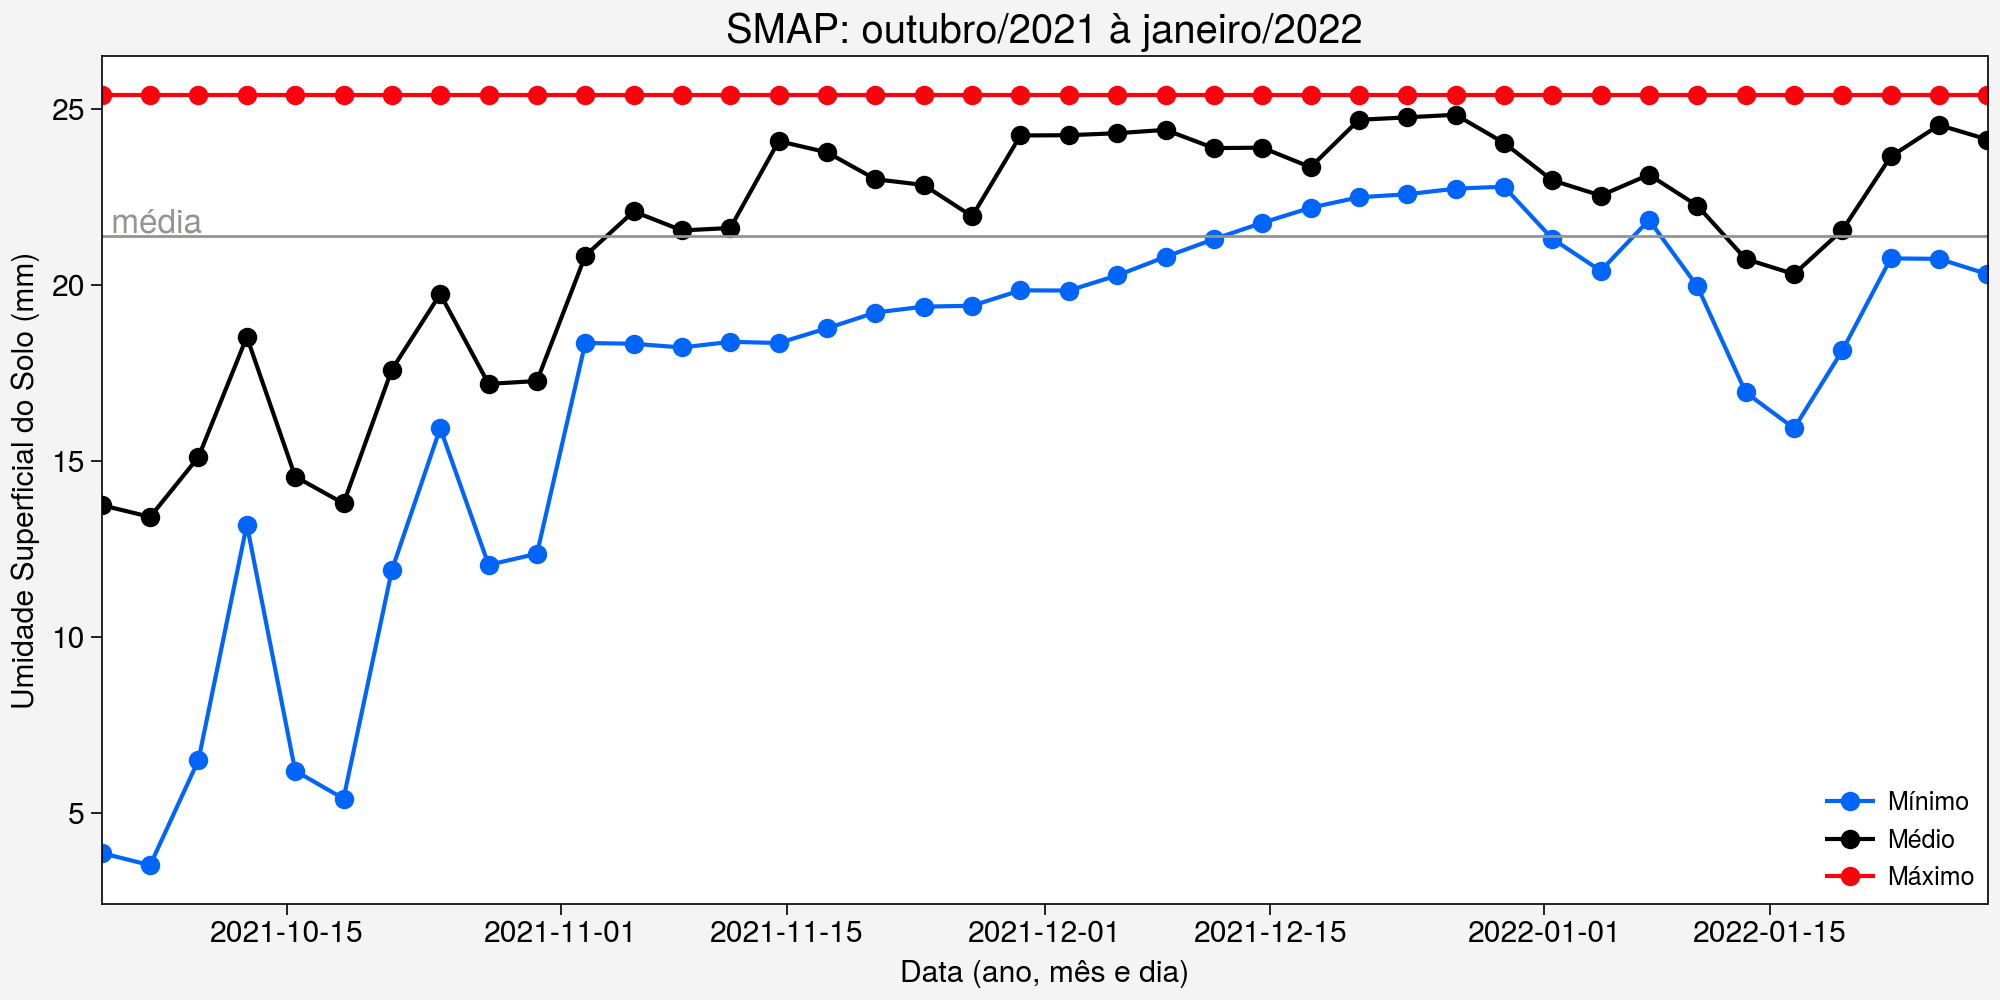

In [22]:
# moldura da figura
fig, ax = plot.subplots(figsize=(10, 5), tight=True)

# plota serie: mínimo
ax.plot(df_min.index,
        df_min['ssm'].values,
        color='bright blue',
        marker='o',
        label='Mínimo')

# plota serie: médio
ax.plot(df_mean.index,
        df_mean['ssm'].values,
        color='black',
        marker='o',
        label='Médio')

# plota serie: máximo
ax.plot(df_max.index,
        df_max['ssm'].values,
        color='bright red',
        marker='o',
        label='Máximo')

# plota linha horizontal da média para o trimestre dez-jan-fev da umidade do solo
ax.axhline(y=df_mean['ssm'].mean(), color='gray', linestyle='-', lw=1.0)
ax.annotate(' média', xy=(df_mean.index[0], df_mean['ssm'].mean()+0.1), fontsize=12, color='gray')

# linha vertical indicando o dia 24/jan/2020
#ax.axvline(x=df_mean.index[18], color='black', linestyle='--', lw=1.0)
#ax.annotate('2020-01-24', xy=(df_mean.index[17], 17), fontsize=10, color='black',
#             bbox=dict(boxstyle="round", fc="0.8"))

# formato dos eixos
ax.format(xlabel='Data (ano, mês e dia)',
          ylabel='Umidade Superficial do Solo (mm)',
          title='SMAP: outubro/2021 à janeiro/2022',
          xtickminor=False, ytickminor=False,
          xrotation=0,
          small='15px', large='20px',
          grid=False)

# legenda
ax.legend(ncol=1, frameon=False)

# salva figura
fig.save(f'Serie_temporal_SMAP.png',
         dpi=300)

#**PARTE 3:** Série temporal para várias localidades

In [23]:
desastres = ['Deslizamento', 'Inundação', 'Alagamento', 'Enxurrada']

In [24]:
def gera_serie_temporal(latx, lonx):

    # região quadrado
    roi_quadrado = ee.Geometry.Rectangle([-49., -23., -35., -10.])

    # importa os dados
    smap = ee.ImageCollection(Snippet) \
             .filterDate('2021-10-01', '2022-01-31') \
             .filterBounds(roi_quadrado)

    # cria um dataframe vazio
    df_deslizamento = pd.DataFrame()

    # loop dos deslizamentos
    i=1
    for lat, lon in zip(latx, lonx):

        # ponto da série temporal
        roi_ponto = ee.Geometry.Point([lon, lat]).buffer(20_000)

        # gera serie temporal
        ts = smap.getTimeSeriesByRegion(geometry = roi_ponto,
                                        bands = ['ssm'],
                                        reducer = ee.Reducer.mean(),
                                        scale = 10_000)

        # transforma para DataFrame do Pandas
        df_mean = geemap.ee_to_pandas(ts)

        # transforma coluna da data para índice
        df_mean['date'] = pd.to_datetime(df_mean['date'], infer_datetime_format = True)
        df_mean.index = df_mean['date']

        # remove colunas
        df_mean.drop(columns=['date','reducer'], axis=1, inplace=True)

        # renomeia nome da coluna
        df_mean.rename(columns={'ssm': f'{i}_ssm_{lat:.2f}_{lon:.2f}'}, inplace=True)

        # contatena dataframes
        df_deslizamento = pd.concat([df_deslizamento, df_mean], axis=1) #axis=1 coloca as colunas ao lado

        i+=1

    return df_deslizamento

In [25]:
# cores da curvas das estações no gráfico
cores = ['gray',
         'brown',
         'black',
         'cyan',
         'blue',
         'darkblue',
         'orange',
         'violet',
         'purple',
         'olive',
         'greenyellow',
         'green',
         'coral',
         'pink',
         'red']
len(cores)

15

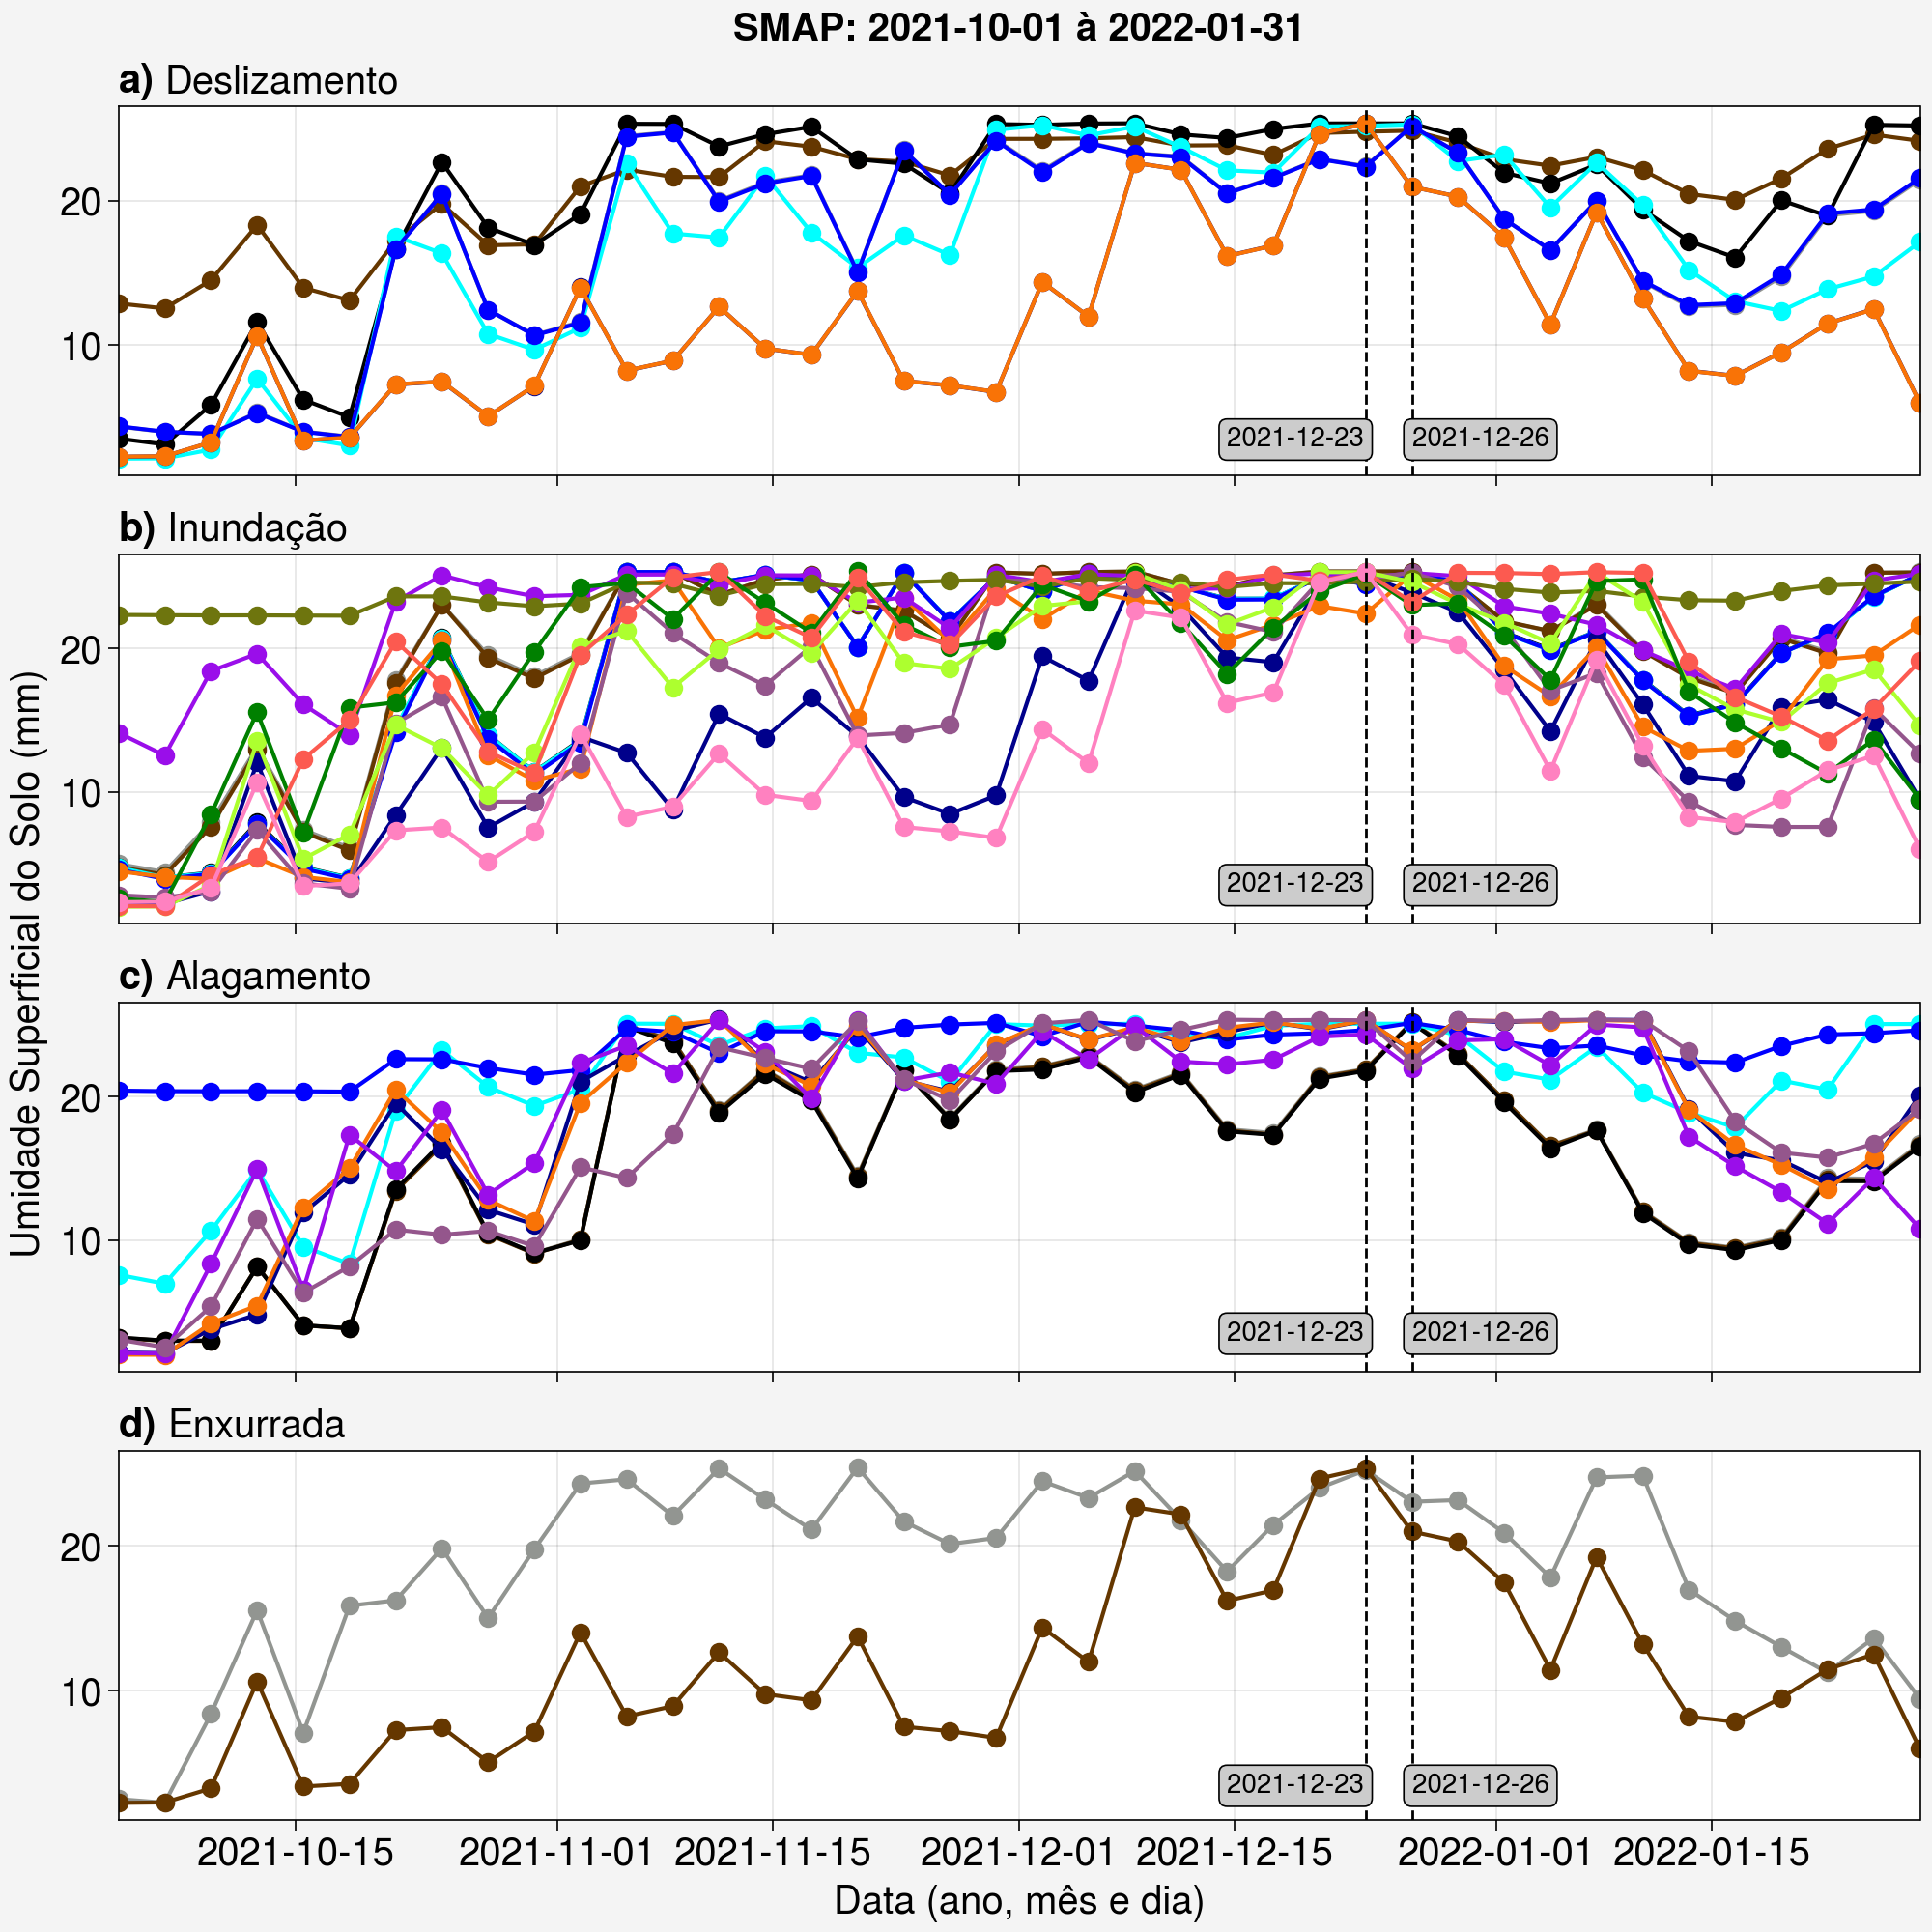

In [26]:
# moldura da figura
fig, ax = plot.subplots(figsize=(10, 10), tight=True, ncols=1, nrows=4)

# formato dos eixos
ax.format(xlabel='Data (ano, mês e dia)',
          ylabel='Umidade Superficial do Solo (mm)',
          xtickminor=False,
          ytickminor=False,
          xrotation=0,
          small='20px',
          large='20px',
          grid=True,
          abc=True,
          abcstyle='a)',
          abcsize=15,
          suptitle='SMAP: 2021-10-01 à 2022-01-31')

#=====================================================================================================================#
#                                           FIGURA 1: DESLIZAMENTO
#=====================================================================================================================#
# seleciona apenas aquele desastre
nome_desastre = 'Deslizamento'
dfx = df[ df['tipo'] == nome_desastre]

# extrai lat/lon
lat_desastres = list(dfx['lat'].values)
lon_desastres = list(dfx['lon'].values)

# gera série temporal
dff = gera_serie_temporal(lat_desastres, lon_desastres)

# plota desastre
for nome_coluna, cor in zip(dff.columns, cores):
    ax[0].plot(dff[nome_coluna].index,
               dff[nome_coluna].values,
               color=cor,
               marker='o',
               label=nome_desastre)

# linha vertical indicando o dia 23 e 26 dez/2021
ax[0].axvline(x=dff.index[27], color='black', linestyle='--', lw=1.0)
ax[0].axvline(x=dff.index[28], color='black', linestyle='--', lw=1.0)
ax[0].annotate('2021-12-23', xy=(dff.index[24], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))
ax[0].annotate('2021-12-26', xy=(dff.index[28], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))

# formatações
ax[0].format(ltitle=nome_desastre)

#=====================================================================================================================#
#                                          FIGURA 2: INUNDAÇÃO
#=====================================================================================================================#
# seleciona apenas aquele desastre
nome_desastre = 'Inundação'
dfx = df[ df['tipo'] == nome_desastre]

# extrai lat/lon
lat_desastres = list(dfx['lat'].values)
lon_desastres = list(dfx['lon'].values)

# gera série temporal
dff = gera_serie_temporal(lat_desastres, lon_desastres)

# plota desastre
for nome_coluna, cor in zip(dff.columns, cores):
    ax[1].plot(dff[nome_coluna].index,
               dff[nome_coluna].values,
               color=cor,
               marker='o',
               label=nome_desastre)

# linha vertical indicando o dia 23 e 26 dez/2021
ax[1].axvline(x=dff.index[27], color='black', linestyle='--', lw=1.0)
ax[1].axvline(x=dff.index[28], color='black', linestyle='--', lw=1.0)
ax[1].annotate('2021-12-23', xy=(dff.index[24], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))
ax[1].annotate('2021-12-26', xy=(dff.index[28], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))

# formatações
ax[1].format(ltitle=nome_desastre)

#=====================================================================================================================#
#                                          FIGURA 3: ALAGAMENTO
#=====================================================================================================================#
# seleciona apenas aquele desastre
nome_desastre = 'Alagamento'
dfx = df[ df['tipo'] == nome_desastre]

# extrai lat/lon
lat_desastres = list(dfx['lat'].values)
lon_desastres = list(dfx['lon'].values)

# gera série temporal
dff = gera_serie_temporal(lat_desastres, lon_desastres)

# plota desastre
for nome_coluna, cor in zip(dff.columns, cores):
    ax[2].plot(dff[nome_coluna].index,
               dff[nome_coluna].values,
               color=cor,
               marker='o',
               label=nome_desastre)

# linha vertical indicando o dia 23 e 26 dez/2021
ax[2].axvline(x=dff.index[27], color='black', linestyle='--', lw=1.0)
ax[2].axvline(x=dff.index[28], color='black', linestyle='--', lw=1.0)
ax[2].annotate('2021-12-23', xy=(dff.index[24], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))
ax[2].annotate('2021-12-26', xy=(dff.index[28], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))

# formatações
ax[2].format(ltitle=nome_desastre)

#=====================================================================================================================#
#                                          FIGURA 4: ENXURRADA
#=====================================================================================================================#
# seleciona apenas aquele desastre
nome_desastre = 'Enxurrada'
dfx = df[ df['tipo'] == nome_desastre]

# extrai lat/lon
lat_desastres = list(dfx['lat'].values)
lon_desastres = list(dfx['lon'].values)

# gera série temporal
dff = gera_serie_temporal(lat_desastres, lon_desastres)

# plota desastre
for nome_coluna, cor in zip(dff.columns, cores):
    ax[3].plot(dff[nome_coluna].index,
               dff[nome_coluna].values,
               color=cor,
               marker='o',
               label=nome_desastre)

# linha vertical indicando o dia 23 e 26 dez/2021
ax[3].axvline(x=dff.index[27], color='black', linestyle='--', lw=1.0)
ax[3].axvline(x=dff.index[28], color='black', linestyle='--', lw=1.0)
ax[3].annotate('2021-12-23', xy=(dff.index[24], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))
ax[3].annotate('2021-12-26', xy=(dff.index[28], 3), fontsize=10, color='black', bbox=dict(boxstyle="round", fc="0.8"))

# formatações
ax[3].format(ltitle=nome_desastre)

#=====================================================================================================================#
# salva figura
fig.save(f'Fig_2_Serie_temporal_SMAP_desastres.png',
         dpi=300)

#**PARTE 4:** Mapa

In [27]:
# ==========================================
#                2/dez
# ==========================================
# carregando os dados
smap = ee.ImageCollection(Snippet).filterDate('2021-12-02', '2021-12-03').filterBounds(roi_quadrado)

# convertendo a FeatureCollection para xarray.Dataset
dset_2 = smap \
          .first() \
          .clip(roi_quadrado) \
          .wx.to_xarray(region=roi_quadrado, scale=10_000)

# ==========================================
#                14/dez
# ==========================================
# carregando os dados
smap = ee.ImageCollection(Snippet).filterDate('2021-12-14', '2021-12-15').filterBounds(roi_quadrado)

# convertendo a FeatureCollection para xarray.Dataset
dset_14 = smap \
          .first() \
          .clip(roi_quadrado) \
          .wx.to_xarray(region=roi_quadrado, scale=10_000)

# ==========================================
#                23/dez
# ==========================================
# carregando os dados
smap = ee.ImageCollection(Snippet).filterDate('2021-12-23', '2021-12-26').filterBounds(roi_quadrado)

# convertendo a FeatureCollection para xarray.Dataset
dset_23 = smap \
          .first() \
          .clip(roi_quadrado) \
          .wx.to_xarray(region=roi_quadrado, scale=10_000)

# ==========================================
#                26/dez
# ==========================================
# carregando os dados
smap = ee.ImageCollection(Snippet).filterDate('2021-12-26', '2021-12-27').filterBounds(roi_quadrado)

# convertendo a FeatureCollection para xarray.Dataset
dset_26 = smap \
          .first() \
          .clip(roi_quadrado) \
          .wx.to_xarray(region=roi_quadrado, scale=10_000)

Downloading:   0%|          | 0.00/187k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/182k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/176k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/177k [00:00<?, ?iB/s]

In [28]:
dset_2

<xarray.Dataset>
Dimensions:      (time: 1, x: 157, y: 147)
Coordinates:
  * time         (time) datetime64[ns] 2021-12-02T12:00:00
  * x            (x) float64 -49.0 -48.91 -48.82 -48.73 ... -35.17 -35.08 -34.99
  * y            (y) float64 -10.02 -10.11 -10.2 -10.29 ... -22.95 -23.04 -23.13
    spatial_ref  int64 0
Data variables:
    ssm          (time, y, x) float32 24.36 25.4 25.4 19.56 ... nan nan nan nan
    susm         (time, y, x) float32 140.7 170.6 170.6 108.4 ... nan nan nan
    smp          (time, y, x) float32 0.8296 0.99 0.99 0.6954 ... nan nan nan
    ssma         (time, y, x) float32 1.28 1.19 1.19 0.9689 ... nan nan nan nan
    susma        (time, y, x) float32 0.9633 1.248 1.248 0.8684 ... nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [29]:
dset_14

<xarray.Dataset>
Dimensions:      (time: 1, x: 157, y: 147)
Coordinates:
  * time         (time) datetime64[ns] 2021-12-14T12:00:00
  * x            (x) float64 -49.0 -48.91 -48.82 -48.73 ... -35.17 -35.08 -34.99
  * y            (y) float64 -10.02 -10.11 -10.2 -10.29 ... -22.95 -23.04 -23.13
    spatial_ref  int64 0
Data variables:
    ssm          (time, y, x) float32 22.71 23.68 23.68 21.27 ... nan nan nan
    susm         (time, y, x) float32 167.4 170.5 170.5 133.6 ... nan nan nan
    smp          (time, y, x) float32 0.9555 0.9809 0.9809 ... nan nan nan
    ssma         (time, y, x) float32 0.869 0.8775 0.8775 0.9443 ... nan nan nan
    susma        (time, y, x) float32 1.193 1.064 1.064 1.036 ... nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [30]:
dset_23

<xarray.Dataset>
Dimensions:      (time: 1, x: 157, y: 147)
Coordinates:
  * time         (time) datetime64[ns] 2021-12-23T12:00:00
  * x            (x) float64 -49.0 -48.91 -48.82 -48.73 ... -35.17 -35.08 -34.99
  * y            (y) float64 -10.02 -10.11 -10.2 -10.29 ... -22.95 -23.04 -23.13
    spatial_ref  int64 0
Data variables:
    ssm          (time, y, x) float32 25.4 25.4 25.4 25.39 ... nan nan nan nan
    susm         (time, y, x) float32 173.4 172.6 172.6 158.4 ... nan nan nan
    smp          (time, y, x) float32 0.9992 1.0 1.0 0.9991 ... nan nan nan nan
    ssma         (time, y, x) float32 1.222 1.148 1.148 1.45 ... nan nan nan nan
    susma        (time, y, x) float32 1.272 1.144 1.144 1.513 ... nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [31]:
dset_26

<xarray.Dataset>
Dimensions:      (time: 1, x: 157, y: 147)
Coordinates:
  * time         (time) datetime64[ns] 2021-12-26T12:00:00
  * x            (x) float64 -49.0 -48.91 -48.82 -48.73 ... -35.17 -35.08 -34.99
  * y            (y) float64 -10.02 -10.11 -10.2 -10.29 ... -22.95 -23.04 -23.13
    spatial_ref  int64 0
Data variables:
    ssm          (time, y, x) float32 25.4 25.4 25.4 25.36 ... nan nan nan nan
    susm         (time, y, x) float32 173.6 172.6 172.6 158.6 ... nan nan nan
    smp          (time, y, x) float32 1.0 1.0 1.0 0.9995 ... nan nan nan nan
    ssma         (time, y, x) float32 1.188 1.149 1.149 1.442 ... nan nan nan
    susma        (time, y, x) float32 1.223 1.126 1.126 1.488 ... nan nan nan
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [32]:
# lista dos desastres
desastres = list(df['tipo'].unique())

# cores, símbolos e tamanho dos desastres
colors_desastres = ['green', 'yellow','pink','bright red']
simbols_desastres = ['D','o','^','*'] # https://matplotlib.org/stable/api/markers_api.html
size_desastres = [80,70,60,50]

# exibe os desastres
print(desastres)

['Deslizamento', 'Inundação', 'Alagamento', 'Enxurrada']


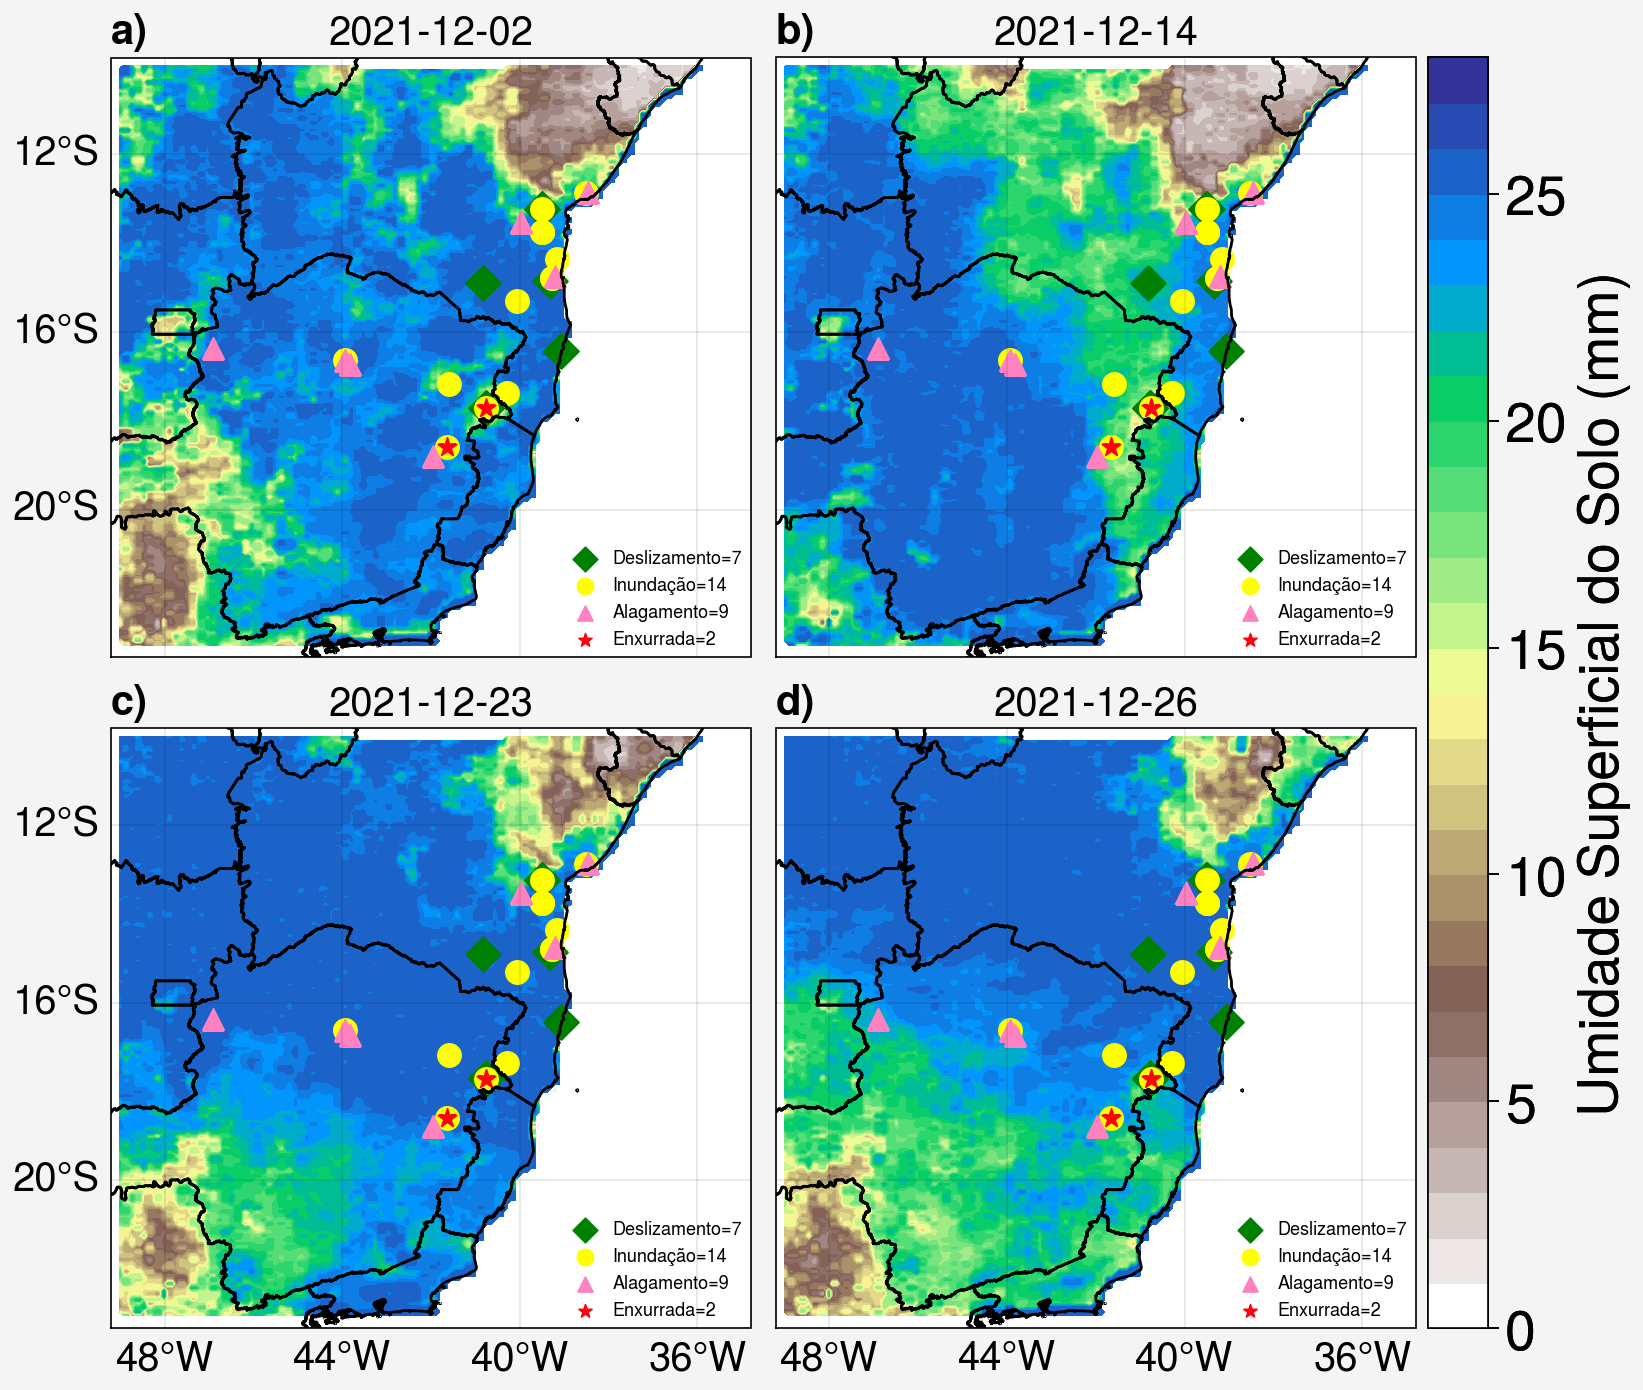

In [33]:
# cria moldura da figura
fig, ax = plot.subplots(ncols=2,
                        nrows=2,
                        axheight=3,
                        tight=True,
                        proj='pcarree')

# limites da imagem
lonmin, lonmax, latmin, latmax = float(dset_23['x'].min()), float(dset_23['x'].max()), float(dset_23['y'].min()), float(dset_23['y'].max())

# formato dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=4,
          title = f'SMAP',
          latlim=(latmin-0.20, latmax+0.20),
          lonlim=(lonmin-0.20, lonmax+0.20),
          small='20px', large='20px',
          abc=True, abcstyle='a)', abcsize=15)

# plota mapa
map1 = ax[0].contourf(dset_2['x'], dset_2['y'], dset_2['ssm'].squeeze(), cmap='terrain_r', levels=plot.arange(0, 28, 1))
ax[1].contourf(dset_14['x'], dset_14['y'], dset_14['ssm'].squeeze(), cmap='terrain_r', levels=plot.arange(0, 28, 1))
ax[2].contourf(dset_23['x'], dset_23['y'], dset_23['ssm'].squeeze(), cmap='terrain_r', levels=plot.arange(0, 28, 1))
ax[3].contourf(dset_26['x'], dset_26['y'], dset_26['ssm'].squeeze(), cmap='terrain_r', levels=plot.arange(0, 28, 1))

# plota desastres
for desastre, simbolo, cor, size in zip(desastres, simbols_desastres, colors_desastres, size_desastres):

    # seleciona apenas aquele desastre
    dfx = df[ df['tipo'] == desastre ]

    # plota desastre
    ax.scatter(dfx['lon'].values,
               dfx['lat'].values,
               transform=ccrs.PlateCarree(),
               marker=simbolo,
               s=size,
               color=cor,
               label=f'{desastre}={dfx.shape[0]}')

# plota título de cada figura
ax[0].format(title='2021-12-02', labels=[True, False, False, False])
ax[1].format(title='2021-12-14', labels=[False])
ax[2].format(title='2021-12-23', labels=[True, False, True, False])
ax[3].format(title='2021-12-26', labels=[False, False, True, False])

# adiciona legenda
ax[0].legend(loc='lr', ncols=1, frameon=False, prop={'size':6.5}, markerscale=0.7)
ax[1].legend(loc='lr', ncols=1, frameon=False, prop={'size':6.5}, markerscale=0.7)
ax[2].legend(loc='lr', ncols=1, frameon=False, prop={'size':6.5}, markerscale=0.7)
ax[3].legend(loc='lr', ncols=1, frameon=False, prop={'size':6.5}, markerscale=0.7)

# plota shapefiles
evm_plot_states('/content/BR_UF_2019.shp', 'black', 1.0)

# plota barra da cores
fig.colorbar(map1, loc='r',
             label='Umidade Superficial do Solo (mm)',
             ticks=5,
             ticklabelsize=20,
             labelsize=20,
             width=0.3,
             space=0.5)

# salva figura
fig.save(f'Fig_1_Mapa_SMAP_dias_2_14_23_26_dez2021.png',
         bbbox_inches='tight',
         dpi=300,
         edgecolor="white")